In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc


# Introdução
# Este notebook analisa os pressupostos e comportamento dos métodos Logistic Regression, LDA e QDA
# em diferentes tipos de conjuntos de dados.

def generate_datasets():
    # Criar dataset com não linearidade
    X1, y1 = make_moons(n_samples=20000, shuffle=True, noise=0.5, random_state=42)

    # Introduzir multicolinearidade adicionando uma feature altamente correlacionada
    X1[:, 1] = X1[:, 1] + 0.7 * X1[:, 0] + 0.1 * np.random.randn(20000)  # Criar dependência entre as variáveis

    # Fixar semente para reprodutibilidade
    np.random.seed(42)
    n_samples = 1000

    # Criar duas distribuições normais mais sobrepondo as classes
    mean_class_0 = [1, 1]  # Média da classe 0
    mean_class_1 = [2, 2]  # Média da classe 1 (pouca separação)

    # Matriz de covariância - alta correlação entre as variáveis (quase colinear)
    cov_matrix = [[2, 1.9], [1.9, 2]]  # A mesma para ambas as classes

    X_class_0 = np.random.multivariate_normal(mean_class_0, cov_matrix, n_samples)
    X_class_1 = np.random.multivariate_normal(mean_class_1, cov_matrix, n_samples)

    X2 = np.vstack((X_class_0, X_class_1))
    y2 = np.array([0] * n_samples + [1] * n_samples)

    
    X3, y3 = make_classification(
        n_samples=1000,   
        n_features=2,     
        n_informative=2,  
        n_redundant=0,    
        n_repeated=0,     
        n_classes=2,      
        n_clusters_per_class=1,
        class_sep=2.0,    
        weights=[0.5, 0.5],  
        random_state=42
    )

    # Modificar variância das classes para ser diferente
    X3[y3 == 0] += np.random.normal(0, 3, size=X3[y3 == 0].shape)  # Variância maior para a classe 0
    X3[y3 == 1] += np.random.normal(0, 1, size=X3[y3 == 1].shape)  # Variância menor para a classe 1

    return (X1, y1), (X2, y2), (X3, y3)
    
# Função para calcular métricas 
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    return accuracy, error_rate, precision

# Treinar e avaliar cada modelo nos datasets
models = {"Logistic Regression": LogisticRegression(), "LDA": LDA(), "QDA": QDA()}
datasets = generate_datasets()

def plot_decision_boundaries(X, y, model, title):
    model.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()


    


Logistic Regression - Exatidão: 0.81, Taxa de Erro: 0.19, Precisão: 0.80


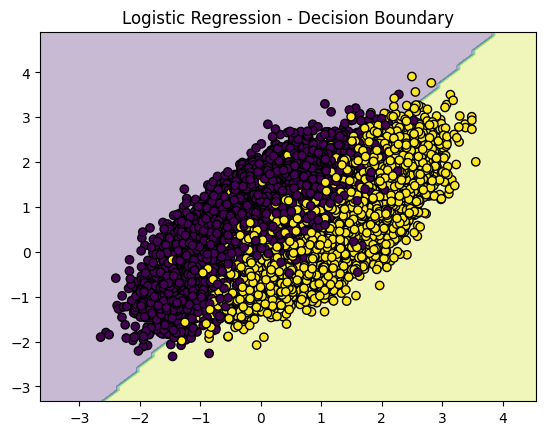

LDA - Exatidão: 0.81, Taxa de Erro: 0.19, Precisão: 0.80


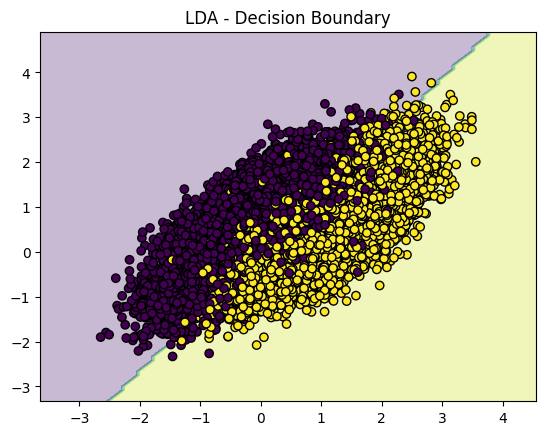

QDA - Exatidão: 0.81, Taxa de Erro: 0.19, Precisão: 0.80


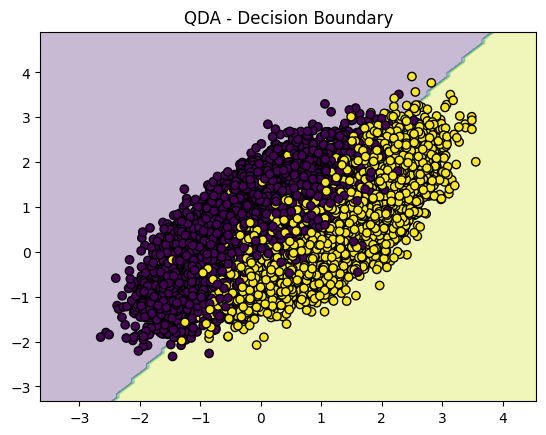

In [385]:
X, y = datasets[0]  

# Avaliar cada modelo no primeiro dataset
for name, model in models.items():
    # Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = model.predict(X_test)
    
    # Calculando as métricas
    accuracy, error_rate, precision = calculate_metrics(y_test, y_pred)
    
    # Exibindo as métricas
    print(f"{name} - Exatidão: {accuracy:.2f}, Taxa de Erro: {error_rate:.2f}, Precisão: {precision:.2f}")
    
    # Plotando as fronteiras de decisão
    plot_decision_boundaries(X, y, model, f"{name} - Decision Boundary")


Logistic Regression - Exatidão: 0.68, Taxa de Erro: 0.32, Precisão: 0.67


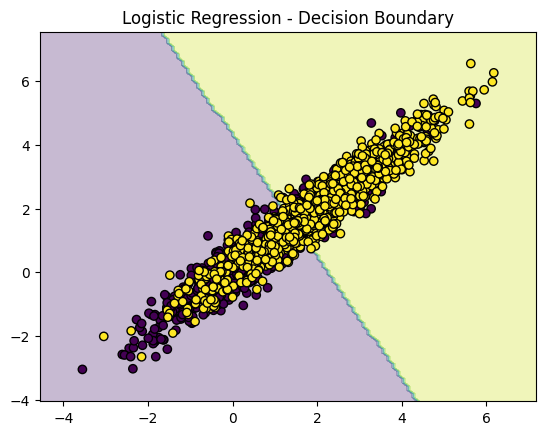

LDA - Exatidão: 0.68, Taxa de Erro: 0.32, Precisão: 0.67


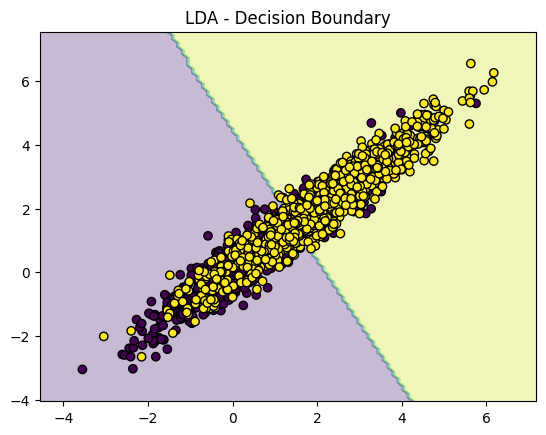

QDA - Exatidão: 0.67, Taxa de Erro: 0.33, Precisão: 0.67


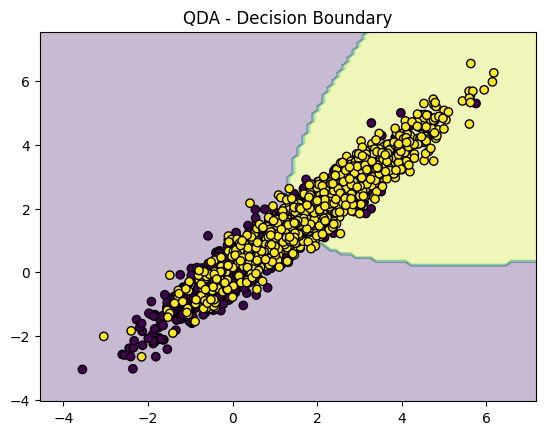

In [386]:
X, y = datasets[1]  

# Avaliar cada modelo no primeiro dataset
for name, model in models.items():
    # Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = model.predict(X_test)
    
    # Calculando as métricas
    accuracy, error_rate, precision = calculate_metrics(y_test, y_pred)
    
    # Exibindo as métricas
    print(f"{name} - Exatidão: {accuracy:.2f}, Taxa de Erro: {error_rate:.2f}, Precisão: {precision:.2f}")
    
    # Plotando as fronteiras de decisão
    plot_decision_boundaries(X, y, model, f"{name} - Decision Boundary")

Logistic Regression - Exatidão: 0.85, Taxa de Erro: 0.15, Precisão: 0.81


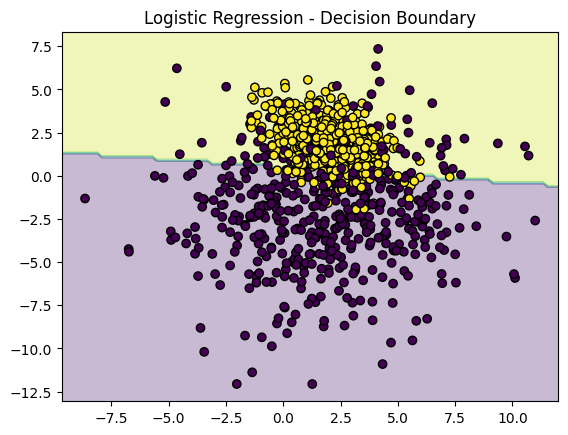

LDA - Exatidão: 0.84, Taxa de Erro: 0.16, Precisão: 0.78


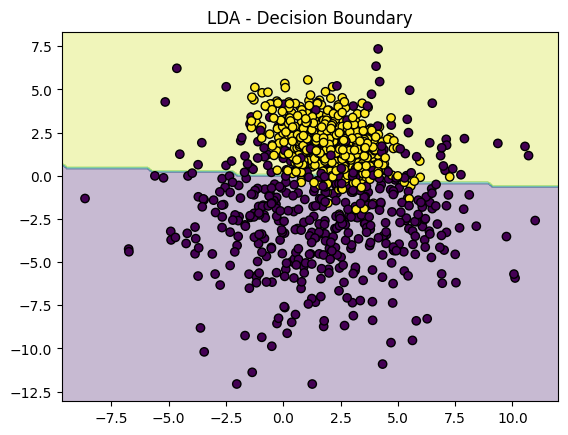

QDA - Exatidão: 0.91, Taxa de Erro: 0.09, Precisão: 0.85


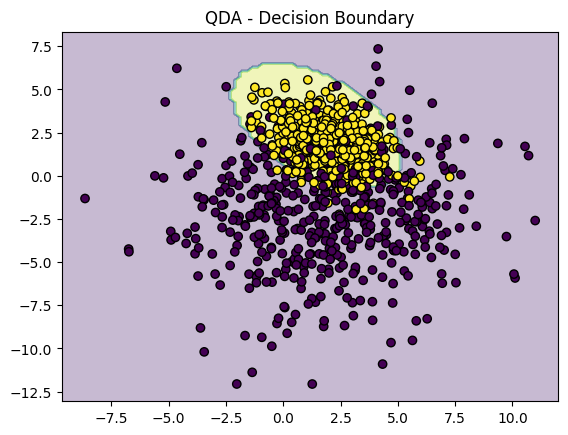

In [387]:
X, y = datasets[2]  

# Avaliar cada modelo no primeiro dataset
for name, model in models.items():
    # Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = model.predict(X_test)
    
    # Calculando as métricas
    accuracy, error_rate, precision = calculate_metrics(y_test, y_pred)
    
    # Exibindo as métricas
    print(f"{name} - Exatidão: {accuracy:.2f}, Taxa de Erro: {error_rate:.2f}, Precisão: {precision:.2f}")
    
    # Plotando as fronteiras de decisão
    plot_decision_boundaries(X, y, model, f"{name} - Decision Boundary")